In [5]:
#Pandas Series -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
#importar biblioteca
import pandas as pd

In [6]:
#Inserindo os dados - 2 maneiras de fazer o upload dos dados, sendo via link ou caminho de pasta.

# notas = pd.read_csv("C:/Users/user/Desktop/Data Science/DataScience_ALURA/Base_Dados/ratings.csv)
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
notas.info() #É possivel observar a quantidade de registros e colunas, o tipo das variáveis da coluna(float64 e int64), se possuem dados nulos e o uso de memoria daqueles dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
#Descobrir o formato da tabela
notas.shape

(100836, 4)

In [9]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"] #Trocando os nomes das colunas
notas.head() #Ver as 5 primeiras linhas

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
notas["nota"].unique() #Extraindo os valores unicos que a tabela possue.

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [11]:
notas["nota"].value_counts() #Contagem dos valores unicos na tabela " Nota "

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [12]:
notas["nota"].mean() #Mostrando a média dos valores da coluna " Nota "

np.float64(3.501556983616962)

<Axes: ylabel='Frequency'>

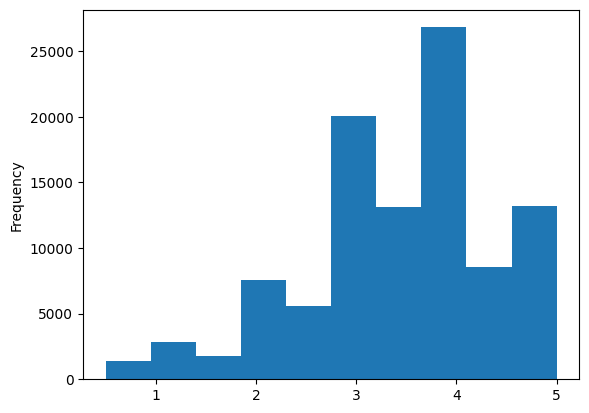

In [13]:
notas["nota"].plot(kind='hist') # Construindo gráfico, "Kind" = ~Tipo e "hist" = histograma

In [14]:
notas["nota"].median() #Mostrando a Mediana da coluna " NOTA "

np.float64(3.5)

In [15]:
mediana = notas["nota"].median()
media = notas["nota"].mean()
print(f"A mediana é {mediana}")
print(f"A média é {media}")

A mediana é 3.5
A média é 3.501556983616962


In [16]:
notas["nota"].describe() #Extraindo as medidas, como: contagem("count"), media(mean), valores minimos, medios e maximos (min, 50% e max)

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [17]:
#" GRAFICOS DIFERENTES TEM PAPEIS DIFERENTES E TRAZEM INFORMAÇÕES DIFERENTES "

<Axes: ylabel='nota'>

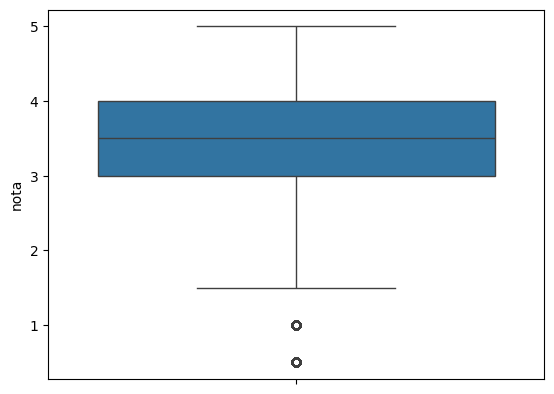

In [18]:
import seaborn as sns

sns.boxplot(notas["nota"]) #Ajuda a perceber a distribuição dos dados. Dessa forma, identificando onde a maioria dos valores se concentra e se há valores muito diferentes dos demais.

In [19]:
#TESTANDO SERIES

# Criando um Series simples
notas_SERIES = pd.Series([10, 8, 4, 10, 3, 1])
notas_SERIES

0    10
1     8
2     4
3    10
4     3
5     1
dtype: int64

In [20]:
notas_SERIES.index #Os dados estao partindo do 0 até 6

RangeIndex(start=0, stop=6, step=1)

In [21]:
notas_SERIES.sort_values() #Assim, podemos ordernar os valores em ordem crescente, sem alterar os índices

5     1
4     3
2     4
1     8
3    10
0    10
dtype: int64

In [22]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"] #Trocando o nome das colunas.
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
notas.query("filmeId==1")["nota"].mean() #Pesquisando a nota média do filme com o Id = 1 (TOYSTORY)

np.float64(3.9209302325581397)

In [25]:
notas.query("filmeId==2")["nota"].mean() #Pesquisando a nota média do filme com o Id = 2 (JUMANJI)

np.float64(3.4318181818181817)

In [26]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean()  #Agrupando todos os filmes e tirando a média deles (Individualmente)
medias_por_filme.head()                                     #Colocando dentro de uma variável afins de boas práticas

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

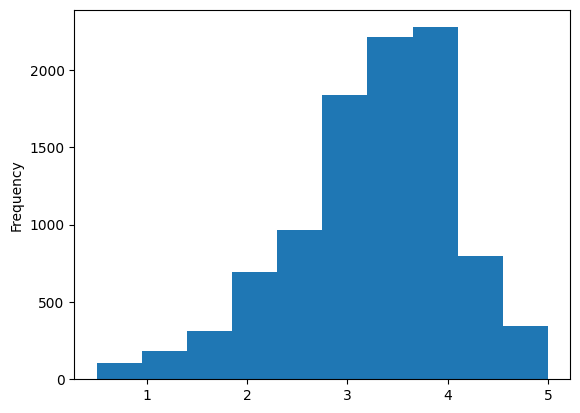

In [27]:
medias_por_filme.plot(kind='hist')

Exercício
- Descobrir:
    - Somatório de todas as vendas de “Ratatouille” do período;
    - Frequência dos métodos de pagamento para o “Ratatouille”;


In [28]:
vendas = pd.read_csv("serenatto_2sem_2023.csv")
vendas.columns = ("iD", "Data", "Produto", "Valor", "Pagamento")
vendas.head()

,iD,Data,Produto,Valor,Pagamento
0,2720,2023-07-01,Risoto de Funghi,13.0,Cartão de Débito
1,2721,2023-07-02,Tiramisù,10.0,Cartão de Débito
2,2722,2023-07-02,Tiramisù,10.0,Cartão de Crédito
3,2723,2023-07-02,Ratatouille,8.5,PIX
4,2724,2023-07-03,Ratatouille,8.5,Dinheiro


In [29]:
somatorio_vendas = vendas.query("Produto=='Ratatouille'").Valor.sum()
print(f"A somatória de vendas dos items 'Ratatouille' foi de R${somatorio_vendas}")

A somatória de vendas dos items 'Ratatouille' foi de R$323.0


In [30]:
frequencia_pagamento = vendas.query("Produto=='Ratatouille'").Pagamento.value_counts()
print(f"A frequencia dos métodos de pagamento sob o produto 'Ratatouille' foi: \n{frequencia_pagamento}")

A frequencia dos métodos de pagamento sob o produto 'Ratatouille' foi: 
Pagamento
PIX                  13
Cartão de Débito     10
Dinheiro              9
Cartão de Crédito     6
Name: count, dtype: int64


<Axes: ylabel='nota'>

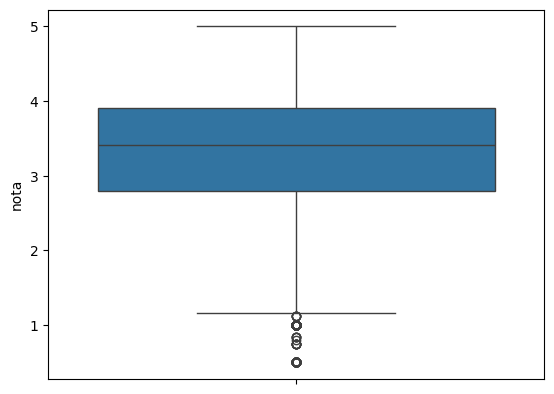

In [31]:
sns.boxplot(medias_por_filme) #Mostrando a distribuição das minhas notas dos filmes por filmes e a mediana.

In [32]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Text(0.5, 1.0, 'Histograma das médias dos filmes')

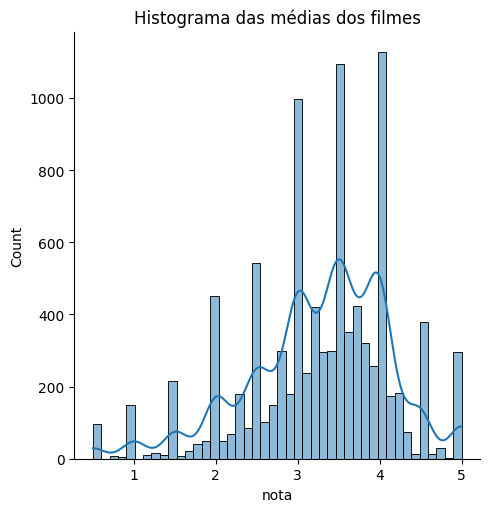

In [33]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True) #Acrescenta mais baldes ao grafico, deixando mais claro a contagem de cada uma das notas medias
plt.title("Histograma das médias dos filmes") #O titulo deve ser sempre após a função de criar o grafico.
                                        #Kde=true - Mostra uma curva de como essa função comportaria

O que eu aprendi nessa primeira parte do curso:
- Trabalhar com o método query() para filtrar linhas de um DataFrame com base em uma expressão;
- Realizar o agrupamento dos dados a partir de uma coluna por meio do método groupby();
- Extrair dados filtrando uma única coluna;
- Modificar os “bins” (intervalos) de um histograma verificando o seu comportamento;
- Identificar as diferentes bibliotecas de visualização, como Matplotlib e Seaborn;
- Inserir textos no notebook para explicar os dados e criar um storytelling de nossas análises.